# Acquaculture

In [17]:
mu <- seq(30, 34, 0.01)
# posterior
sigma <- 2

# priors
m1 <- 30
s1 <- 4

prior1 <- dnorm(mu, m1, s1)

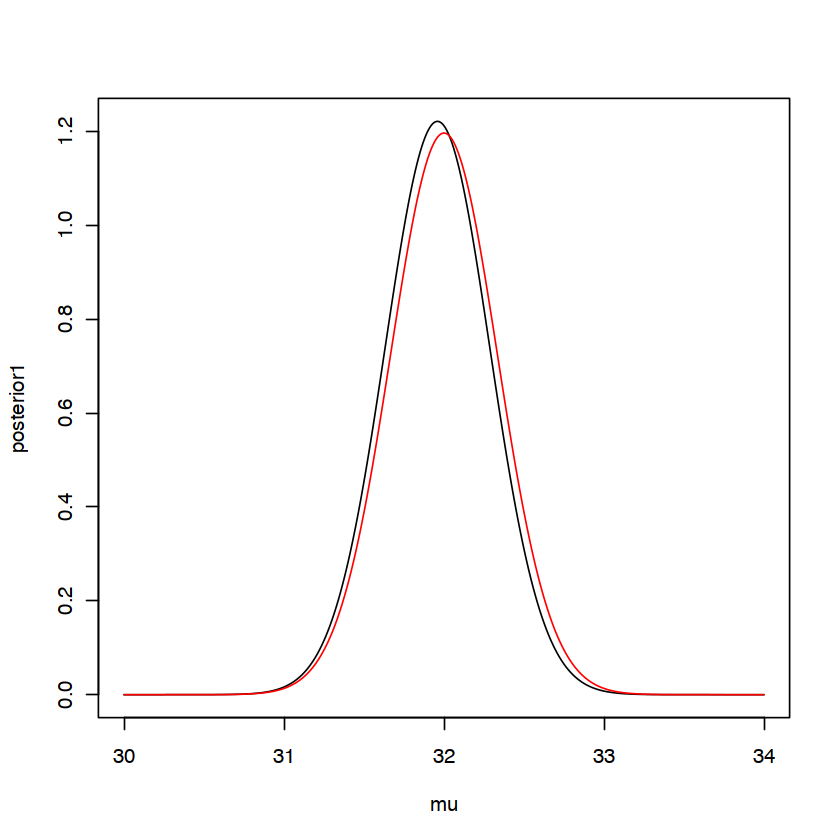

In [24]:
sample_mean <- 32
n <- 12

m_post <- (m1*sigma^2 + n*sample_mean*s1^2)/(sigma^2 + n*s1^2)
var_post <- sigma^2 * s1^2 /(sigma^2 + n*s1^2)

posterior1 <- dnorm(mu, m_post, var_post)
posterior2 <- dnorm(mu, sample_mean, sigma^2/n)

plot(mu, posterior1, type = 'l')
lines(mu, posterior2, col = 'red')

# K/Ar rock dating

In [34]:
# prior
m_60 <- 370
s_60 <- 20

m_70 <- 421
s_70 <- 8

age <- seq(150, 600, 1)

[1] 414

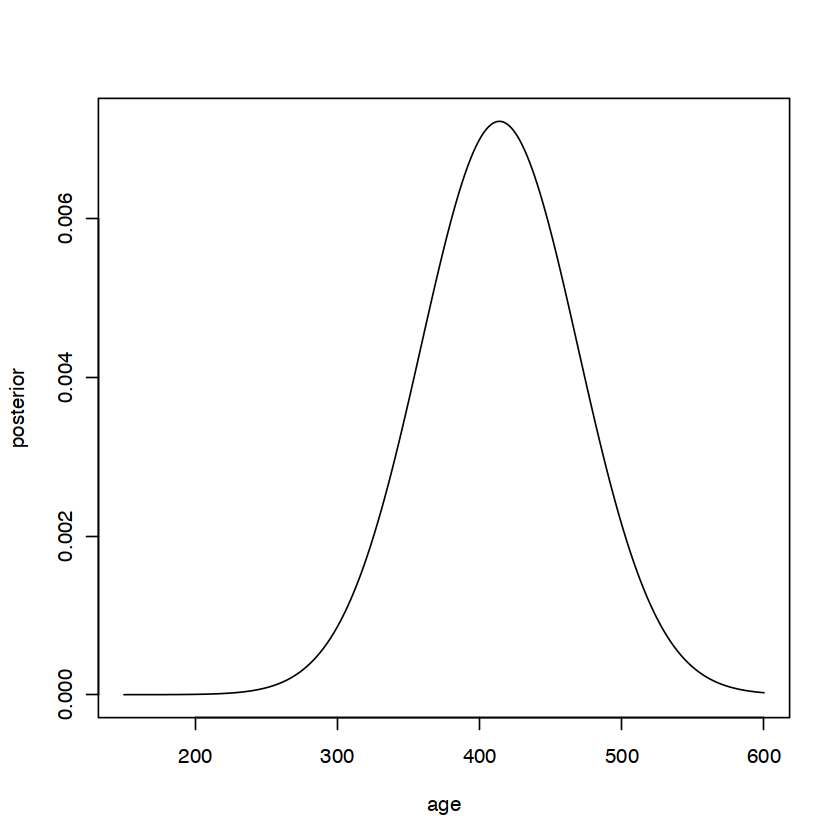

In [37]:
m_post <- (m_60*s_70^2 + m_70*s_60^2)/(s_60^2 + s_70^2)
var_post <- s_70^2 * s_60^2 /(s_70^2 + s_60^2)

posterior <- dnorm(age, m_post, var_post)
plot(age, posterior, type = 'l')

age[which.max(posterior)]

[1] 420.4758

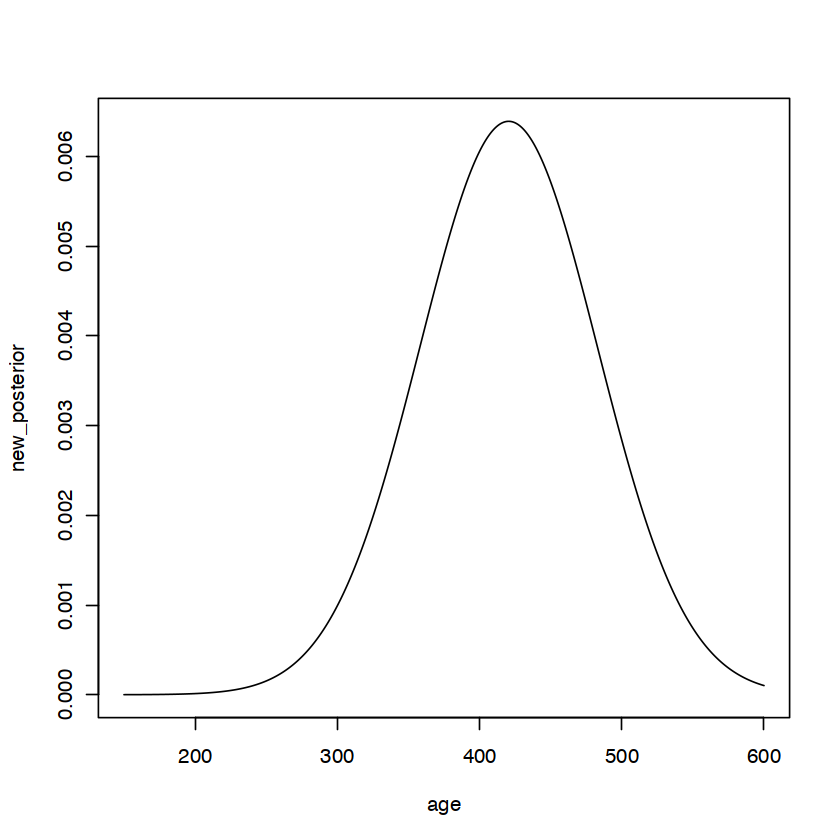

In [43]:
m_prior <- 400
s_prior <- 50

new_m <- (m_prior*s_70^2 + m_70*s_prior^2)/(s_prior^2 + s_70^2)
new_var <- s_70^2 * s_prior^2 /(s_70^2 + s_prior^2)

new_posterior <- dnorm(age, new_m, new_var)
plot(age, new_posterior, type = 'l')

new_m

# One-side hypothesis test

In [3]:
mu_0 <- 31
sigma <- 2
n <- 12
y_mean <- 32

$H_0$: $\mu \leq 31$

### frequentist

In [9]:
z <- (y_mean - mu_0)/(sigma/sqrt(n))
pnorm(z, lower.tail = FALSE)
cat(paste("0.042 < 0.05 so we reject the null hypothesis"))

[1] 0.04163226

0.042 < 0.05 so we reject the null hypothesis

# Speed of light

In [11]:
sigma <- 100
m <- 3*10^5
s <- 500

In [12]:
m_post1 <- 299909
m_post2 <- 299757
s_post1 <- 499
s_post2 <- 434

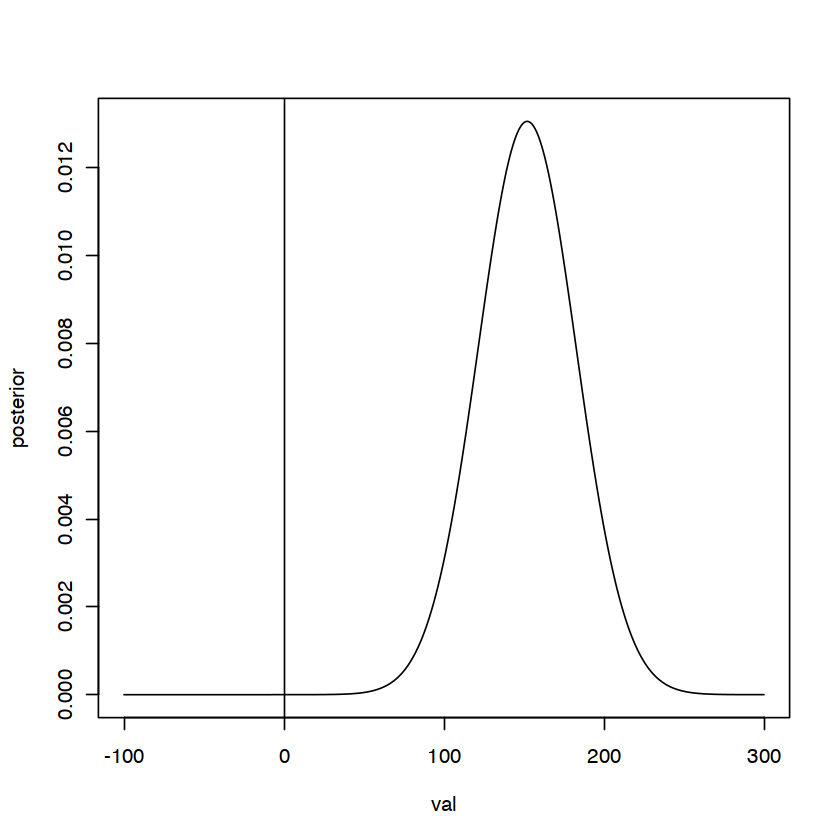

In [27]:
val <- seq(-100, 300)
posterior <- dnorm(val, m_post1 - m_post2, sqrt(s_post1 + s_post2))
plot(val, posterior, type = 'l')
abline(v = 0)

In [28]:
# 95% credibility interval
min <- qnorm(0.025, m_post1 - m_post2, sqrt(s_post1 + s_post2))
max <- qnorm(0.975, m_post1 - m_post2, sqrt(s_post1 + s_post2))
min; max

[1] 92.1328

[1] 211.8672

# Smoking habits in students

In [49]:
n_male <- 100
n_female <- 100
y_male <- 22
y_female <- 31

Beta(1,2) prior

In [30]:
p <- seq(0, 1, 0.001)
post_male <- dbeta(p, 1 + y_male, 2 + n_male - y_male)
post_female <- dbeta(p, 1 + y_female, 2 + n_female - y_female)

In [59]:
m_prime_male <- (1 + y_male) / (1 + y_male + 2 + n_male - y_male)
m_prime_female <- (1 + y_female) / (1 + y_female + 2 + n_female - y_female)

s_prime_male <- (1 + y_male) * (2 + n_male - y_male) / (1 + y_male + 2 + n_male - y_male)^2 / (1 + y_male + 2 + n_male - y_male + 1)
s_prime_female <- (1 + y_female) * (2 + n_female - y_female) / (1 + y_female + 2 + n_female - y_female)^2 / (1 + y_female + 2 + n_female - y_female + 1)

In [88]:
mu <- m_prime_male - m_prime_female
sigma <- sqrt(s_prime_male + s_prime_female)
mu;sigma

[1] -0.08737864

[1] 0.06104817

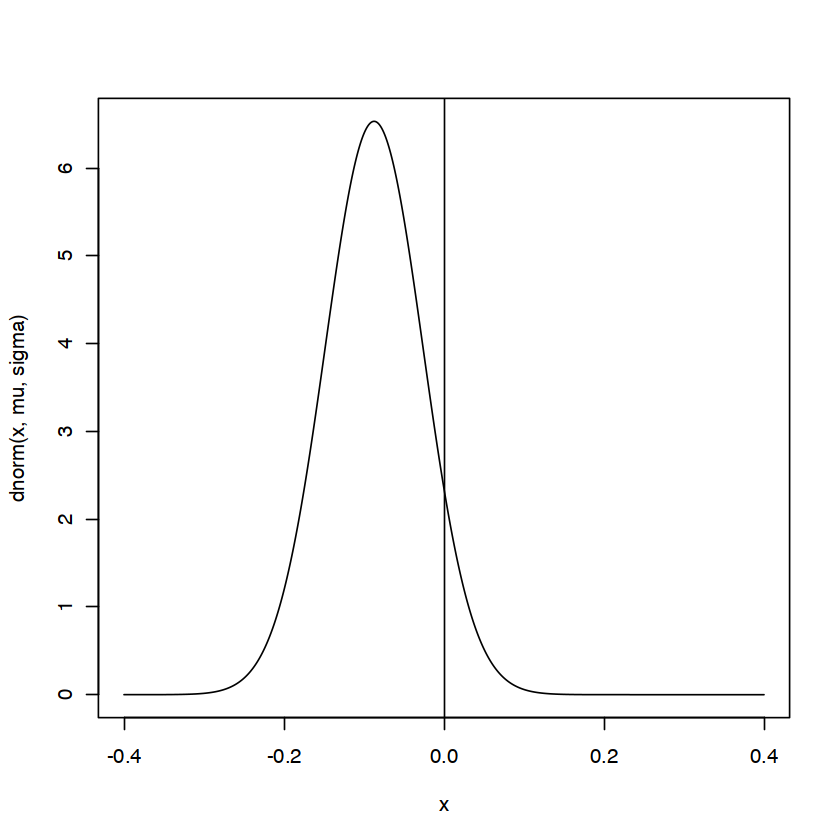

In [89]:
x <- seq(-0.4, 0.4, 0.0001)
plot(x, dnorm(x, mu, sigma), type = 'l')
abline(v = 0)

In [90]:
min <- qnorm(0.025, mu, sigma)
max <- qnorm(0.975, mu, sigma)
min;max

[1] -0.2070309

[1] 0.03227358